# Elaine YouTube Watch History

In [3]:
import pandas as pd
import json
from datetime import datetime

In [ ]:
# Assuming your JSON data is stored in a file called 'data.json'
with open('EZ_data/watch-history-json.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# List to store extracted data
extracted_data = []

# Loop through each entry in the JSON data and extract the relevant fields
for entry in data:
    title = entry.get("title", None)
    url = entry.get("titleUrl", None)
    time_str = entry.get("time", None)

    # Try to parse the date (you can adjust the format if needed)
    date_time = None
    if time_str:
        try:
            date_time = datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            date_time = time_str  # Keep original string if parsing fails

    # Only append if there is a valid title (to avoid extra records)
    if title:
        extracted_data.append({"title": title, "url": url, "date_time": date_time})

# Convert the extracted data to a DataFrame
df = pd.DataFrame(extracted_data)
df.head()


,title,url,date_time
0,Watched Square: Moulin Rouge! The Musical | Al...,https://www.youtube.com/watch?v=20ULlzE8D9M,2025-02-23 22:14:52.443000
1,Watched What happened to Asian Girl Squad??,https://www.youtube.com/watch?v=y-IAIvuorwo,2025-02-23 19:59:30.185000
2,Watched Moulin Rouge! The Musical | Altria The...,https://www.youtube.com/watch?v=2HsgXO5RU-o,2025-02-23 19:59:17.681000
3,Watched Ray-Ban Meta Big Game | Where’s My Car?,https://www.youtube.com/watch?v=WM3ugxIZvlg,2025-02-23 19:59:01.638000
4,Watched CLIF Bar | Raise Your Bar | Showing Up,https://www.youtube.com/watch?v=gJzKraNhd3s,2025-02-23 19:58:49.003000


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce', utc=True)

# Convert from UTC to US/Eastern timezone
df['date_time'] = df['date_time'].dt.tz_convert('US/Eastern')

# Extract the date and time separately
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df.head(2)

,title,url,date_time,date,time
0,Watched Square: Moulin Rouge! The Musical | Al...,https://www.youtube.com/watch?v=20ULlzE8D9M,2025-02-23 17:14:52.443000-05:00,2025-02-23,17:14:52.443000
1,Watched What happened to Asian Girl Squad??,https://www.youtube.com/watch?v=y-IAIvuorwo,2025-02-23 14:59:30.185000-05:00,2025-02-23,14:59:30.185000


In [5]:
youtube = pd.read_csv('EZ_data/elaine_cleaned_youtube.csv')
sleep_df = pd.read_csv('elaine_sleep_data.csv')

In [6]:
start_date = pd.to_datetime('2025-01-01')
end_date = pd.to_datetime('2025-02-17')

youtube['date'] = pd.to_datetime(youtube['date'], errors='coerce')

# Filter data within the date range
youtube = youtube[(youtube['date'] >= start_date) & (youtube['date'] <= end_date)]
youtube = youtube.reset_index(drop=True)
youtube = youtube.drop(columns=['Unnamed: 0'])

youtube.head()

,title,url,date_time,date,time
0,Watched Now Taxes is Fast Money - TurboTax 202...,https://www.youtube.com/watch?v=Um-W3IbUS04,2025-02-17 20:23:36.499000-05:00,2025-02-17,20:23:36.499000
1,"Watched Healthy Grocery Haul, Birthday Gifts +...",https://www.youtube.com/watch?v=IcGUA60MVo0,2025-02-17 20:14:50.825000-05:00,2025-02-17,20:14:50.825000
2,Watched Farmer (Short) | LiMu Emu & Doug | Lib...,https://www.youtube.com/watch?v=yyTOb7BtzbY,2025-02-17 20:14:44.034000-05:00,2025-02-17,20:14:44.034000
3,Watched Shop 80% Off Everything,https://www.youtube.com/watch?v=3I7NASr7NOk,2025-02-17 20:14:41.104000-05:00,2025-02-17,20:14:41.104000
4,Watched How to do a double crochet stitch (dc)...,https://www.youtube.com/watch?v=a1whu6Gub1M,2025-02-17 13:56:50.541000-05:00,2025-02-17,13:56:50.541000


In [7]:
# Group by date and count the number of videos watched per day
videos_per_day = youtube.groupby('date').size().reset_index(name='total_videos_watched')
videos_per_day['date'] = pd.to_datetime(videos_per_day['date'], errors='coerce')

videos_per_day.head()


,date,total_videos_watched
0,2025-01-01,6
1,2025-01-02,45
2,2025-01-03,35
3,2025-01-04,11
4,2025-01-05,39


In [8]:
sleep_df['Date'] = pd.to_datetime(sleep_df['Date'], errors='coerce')
merged_df = sleep_df.merge(videos_per_day, left_on="Date", right_on="date", how="left")
merged_df = merged_df[merged_df['total_videos_watched'] <= 180]


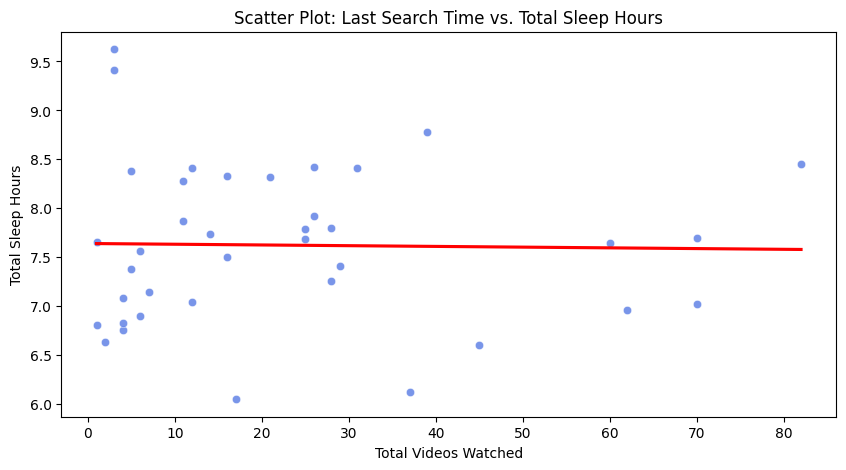

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x="total_videos_watched", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=merged_df, x="total_videos_watched", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Total Videos Watched")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Search Time vs. Total Sleep Hours")
# plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()